<a href="https://colab.research.google.com/github/Gauri-sharma2003/Gauri-sharma2003.github.io/blob/main/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
118/118 [==============================] - 13s 72ms/step - loss: 3.3312e-04
Epoch 2/10
118/118 [==============================] - 7s 62ms/step - loss: 2.9011e-05
Epoch 3/10
118/118 [==============================] - 8s 72ms/step - loss: 2.4835e-05
Epoch 4/10
118/118 [==============================] - 8s 69ms/step - loss: 2.2141e-05
Epoch 5/10
118/118 [==============================] - 8s 64ms/step - loss: 2.0209e-05
Epoch 6/10
118/118 [==============================] - 9s 73ms/step - loss: 2.0296e-05
Epoch 7/10
118/118 [==============================] - 7s 62ms/step - loss: 1.8732e-05
Epoch 8/10
118/118 [==============================] - 9s 73ms/step - loss: 1.7671e-05
Epoch 9/10
118/118 [==============================] - 9s 72ms/step - loss: 1.7224e-05
Epoch 10/10
28/28 [==============================] - 1s 18ms/step


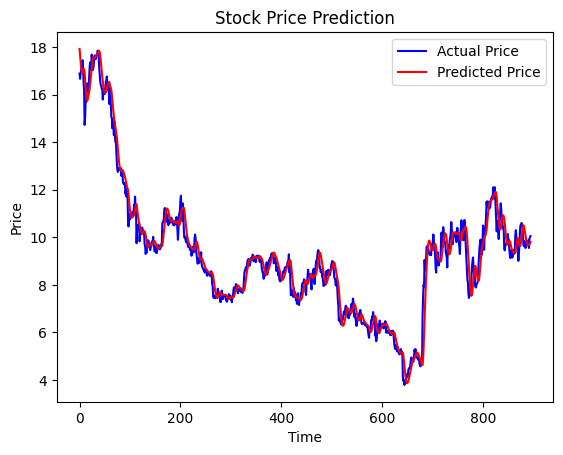

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('GME_stock.csv')

# Extract the 'Close' price column
close_prices = data['close_price'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_size = int(len(scaled_prices) * 0.8)
train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:]

# Prepare the data for LSTM
def create_dataset(dataset, time_steps=1):
    X, y = [], []
    for i in range(len(dataset) - time_steps):
        X.append(dataset[i:i+time_steps, 0])
        y.append(dataset[i+time_steps, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape the input data for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Plot the predicted and actual prices
plt.plot(close_prices[train_size + time_steps:], color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


Stock prediction is a challenging task that involves attempting to forecast the future price movements of stocks or other financial instruments. It is an area of study that combines elements of finance, statistics, machine learning, and data analysis. While no prediction method can guarantee accurate results, several approaches and techniques are commonly used in stock prediction research and practice.# New Section